Eyüphan Seymen, 21040101007, Veri Madenciliği(FET308), SAJJAD NEMATZADEH MİANDOAB, Bilgisayar Mühendisliği, Mühendislik Fakültesi, İstanbul Topkapı Üniversitesi 

Kira Bilgileri dataseti: https://www.kaggle.com/datasets/iamsouravbanerjee/house-rent-prediction-dataset/

Bu veri seti, kiralık olarak sunulan yaklaşık 4700'den fazla konut, daire ve daireleri kapsayan geniş bir veri koleksiyonunu içermektedir. Bu veri seti, yatak odası sayısı (BHK), kira fiyatları, mülk büyüklüğü, kat sayısı, bölge tipi, yerel bölge, şehir, mobilya durumu, kiracı tercihleri, banyo sayısı ve ilgili iletişim bilgileri gibi çeşitli özelliklerle zengindir.

Veri Seti Açıklaması (Sütunlara Göre)
BHK: Yatak Odası, Oturma Odası, Mutfak Sayısı.
Kira: Evlerin/Dairelerin/Katların Kirası.
Boyut: Kare Fit Cinsinden Evlerin/Dairelerin/Katların Boyutu.
Kat: Hangi Kat ve Toplam Kat Sayısında bulunan Evler/Daireler/Katlar (Örnek: 2 Katlı olanın zemin katı, 5 Katlı olanın 3. katı, vb.)
Bölge Tipi: Evlerin/Dairelerin/Katların Super Alanı veya Halı Alanı veya İnşaat Alanı olarak hesaplanmış boyutu.
Bölge Yerel Yeri: Evlerin/Dairelerin/Katların Bulunduğu Yerel Bölge.
Şehir: Evlerin/Dairelerin/Katların Bulunduğu Şehir.
Mobilya Durumu: Evlerin/Dairelerin/Katların Mobilya Durumu, Mobilyalı mı, Yarı Mobilyalı mı, Mobilyasız mı.
Kiracı Tercihi: Sahip veya Emlakçı Tarafından Tercih Edilen Kiracı Türü.
Banyo: Banyo Sayısı.
İletişim Noktası: Evlerin/Dairelerin/Katların daha fazla bilgi için kimle iletişime geçmeniz gerektiği.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker


In [3]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [4]:
selected_columns = ['Rent', 'BHK', 'Size']
subset= df[selected_columns]  
correlation_matrix = subset.corr()
print(correlation_matrix)
# BHK Yatak Odası, Salon, Mutfak Sayısı.

          Rent       BHK      Size
Rent  1.000000  0.469925  0.511398
BHK   0.469925  1.000000  0.716117
Size  0.511398  0.716117  1.000000


In [5]:
num_rows, num_columns = df.shape
print(f"Satırların sayısı: {num_rows}")
print(f"Sütunların sayısı: {num_columns}")
data_types = df.dtypes
print("\nData tipleri:")
print(data_types)

Satırların sayısı: 4745
Sütunların sayısı: 12

Data tipleri:
Posted On            object
BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object


In [6]:
statistics = df.describe()

print(statistics)

               BHK          Rent         Size     Bathroom
count  4745.000000  4.745000e+03  4745.000000  4745.000000
mean      2.083667  3.426321e+04   967.167756     1.965648
std       0.832237  5.975393e+04   633.878701     0.884497
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  1.200000e+06  8000.000000    10.000000


In [10]:
selected_column = 'Rent'
rent_data = df[selected_column].astype(int)
#print(rent_data)
sorted_rent_data = np.sort(rent_data)
#print(sorted_rent_data)
bin_size = 60000
min_rent = 0
max_rent = 1200000
num_bins = int((max_rent - min_rent) / bin_size)
hist, bin_edges = np.histogram(rent_data, bins=num_bins, range=(min_rent, max_rent))


pdf = hist / (len(rent_data))
cdf_values= np.cumsum(pdf)

print(pdf)
print(cdf_values)

[8.69125395e-01 7.52370917e-02 2.55005269e-02 1.22233930e-02
 6.95468915e-03 5.90094837e-03 2.31822972e-03 2.10748156e-04
 4.21496312e-04 0.00000000e+00 1.05374078e-03 4.21496312e-04
 0.00000000e+00 0.00000000e+00 2.10748156e-04 0.00000000e+00
 2.10748156e-04 0.00000000e+00 0.00000000e+00 2.10748156e-04]
[0.8691254  0.94436249 0.96986301 0.98208641 0.9890411  0.99494204
 0.99726027 0.99747102 0.99789252 0.99789252 0.99894626 0.99936776
 0.99936776 0.99936776 0.9995785  0.9995785  0.99978925 0.99978925
 0.99978925 1.        ]


c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


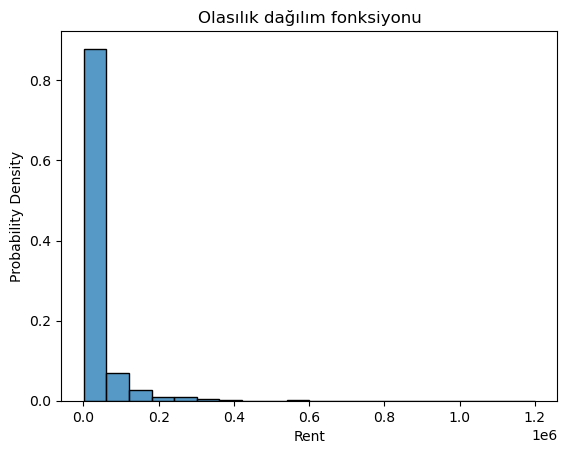

In [35]:
sns.histplot(rent_data, bins=num_bins, stat='probability')

plt.xlabel('Rent')
plt.ylabel('Probability Density')
plt.title('Olasılık dağılım fonksiyonu')

plt.show()


Kira değerlerinin olasılık dağılım fonksiyonu, kira değerlerinin 0 rupi ile 500.000 rupi arasında toplandığını diğer aralıklara olan dağılımın son derece az olduğunu göstermiştir.

c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


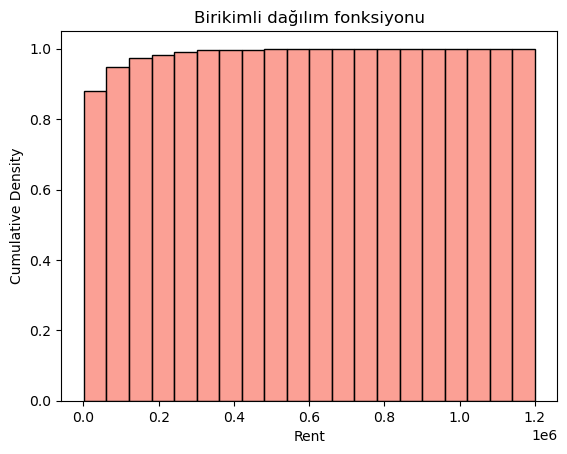

In [36]:
sns.histplot(rent_data,bins=num_bins,cumulative=True,color="salmon",stat="density")
plt.xlabel('Rent')
plt.ylabel('Cumulative Density')
plt.title('Birikimli dağılım fonksiyonu')

plt.show()

Kira değerlerinin birikimli dağılım fonksiyonu, birikimli dağılımın 1'e başlangıçtan itibaren son derece hızlı yaklaştığını göstermiştir. Bu da dağılımın ilk değerlerde toplandığını gösterir.

c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

Text(0.5, 1.0, 'Büyüklük, kira değeri ve mobilya durumu dağılım grafiği')

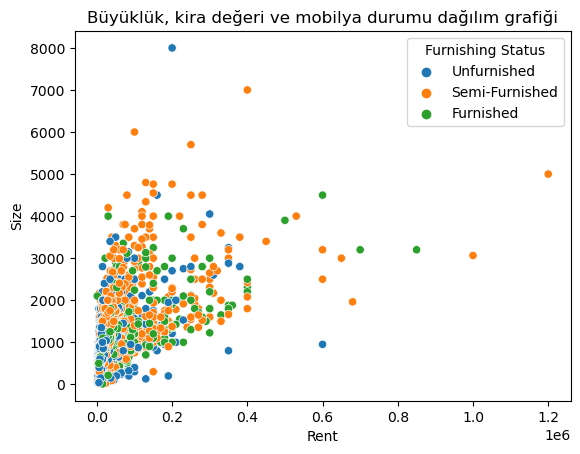

In [37]:
sns.scatterplot(data=df, x="Rent", y="Size", hue="Furnishing Status")

plt.title("Büyüklük, kira değeri ve mobilya durumu dağılım grafiği")

Dağılım grafiği, kira ve büyüklük arasında korelasyon olduğunu göstermiştir. Aynı zamanda evlerin kira değerlerinin mobilyalı olma durumlarıyla ilişkide olduğu görülür.

c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


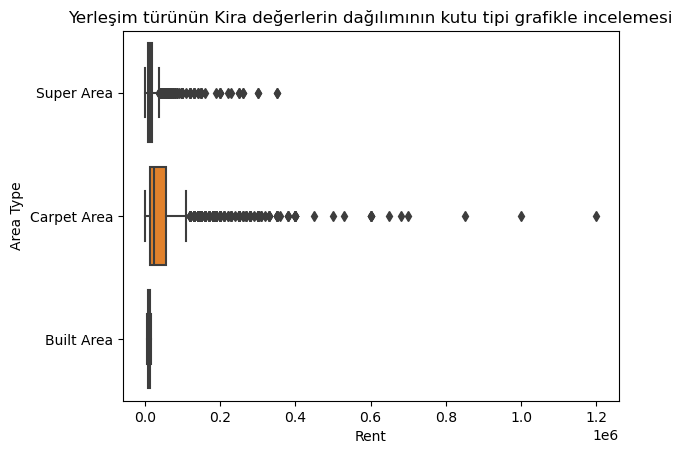

In [39]:

sns.boxplot(data=df, x="Rent", y="Area Type")
plt.title("Yerleşim türünün Kira değerlerin dağılımının kutu tipi grafikle incelemesi")
# displaying chart 
plt.show() 

Carpet area kategorisinin dağılımının daha çeşitli olduğu görülmüştür. En yüksek kira değerine sahip evler Carpet Area kategorisinde bulunur. Aynı zamanda ortalamasının en yüksek olduğu da gözlenir. Super Area kategorisinin de relatif olarak dağılımlı olduğu söylenebilir. Super Area kategorisine ait olan oldukça pahalı kira değerine sahip evler olduğu da görülür. Built area kategorisindeki evler ise oldukça toplu ve bir aradadır. Bu kategoriye ait evler arasında fiyatı 200.000 rupiyi geçen hiç ev yoktur.

c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

Text(0.5, 1.0, 'Kira değerlerinin yoğunluk dağılımının tercih edilen kiracı tipine göre incelemesi')

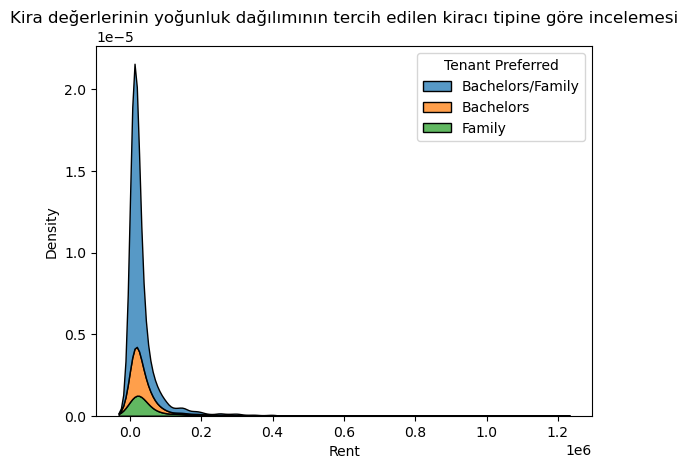

In [40]:
sns.kdeplot(data=df, x="Rent", hue="Tenant Preferred", multiple="stack")
plt.title("Kira değerlerinin yoğunluk dağılımının tercih edilen kiracı tipine göre incelemesi")


Çekirdek yoğunluk fonksiyonu Bekarları ve Aileleri kabul eden ev sahiplerinin çoğunlukta olduğunu gösterir. Sadece Bekarları kabul eden ev sahipleri ikinci sırayı alırken, Sadece aileleri kabul eden ev sahipleri yoğunluk olarak en azdır.

c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\eplocal\anaconda3\envs\eyuphan\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Tercih edlien iletişim tipinin büyüklükle ilişkisinin incelemesi')

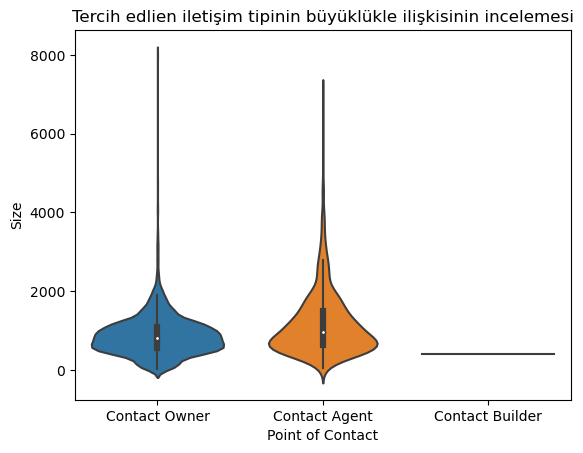

In [42]:
sns.violinplot(data=df, x="Point of Contact", y="Size")
plt.title("Tercih edlien iletişim tipinin büyüklükle ilişkisinin incelemesi")

Emlakçıyla anlaşan ev sahiplerinin ortalamada daha büyük evlere sahip olduğu görülür. Aynı zamanda büyüklük açısından dağılımları daha fazladır.